## Importación de las librerías necesarias para el EDA

In [2]:
import numpy as np
import pandas as pd
import ydata_profiling as ydp
import matplotlib.pyplot as plt
import seaborn as sns

## EDA: data frame "df_movie"

#### Carga de datos

In [3]:
df_movie=pd.read_csv(r"https://raw.githubusercontent.com/JersonGB22/ProyectoIndividualN1/main/Datasets/platform_transformation.csv")
df_movie.head(3)

,id,type,title,director,cast,country,date_added,release_year,rating,listed_in,description,duration_int,duration_type,score
0,as1,movie,the grand seduction,don mckellar,"brendan gleeson, taylor kitsch, gordon pinsent",canada,2021-03-30,2014,g,"comedy, drama",a small fishing village must procure a local d...,113.0,min,3.47
1,as2,movie,take care good night,girish joshi,"mahesh manjrekar, abhay mahajan, sachin khedekar",india,2021-03-30,2018,13+,"drama, international",a metro family decides to fight a cyber crimin...,110.0,min,3.55
2,as3,movie,secrets of deception,josh webber,"tom sizemore, lorenzo lamas, robert lasardo, r...",united states,2021-03-30,2017,g,"action, drama, suspense",after a man discovers his wife is cheating on ...,74.0,min,3.50


In [4]:
df_movie.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22998 entries, 0 to 22997
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             22998 non-null  object 
 1   type           22998 non-null  object 
 2   title          22998 non-null  object 
 3   director       14739 non-null  object 
 4   cast           17677 non-null  object 
 5   country        11499 non-null  object 
 6   date_added     13444 non-null  object 
 7   release_year   22998 non-null  int64  
 8   rating         22998 non-null  object 
 9   listed_in      22998 non-null  object 
 10  description    22994 non-null  object 
 11  duration_int   22811 non-null  float64
 12  duration_type  22811 non-null  object 
 13  score          22998 non-null  float64
dtypes: float64(2), int64(1), object(11)
memory usage: 2.5+ MB


* Observación: Para realizar el Sistema de recomendación de películas en Machine Learning (Filtro Colaborativo), según la consigna "...donde dado un id de usuario y una película, nos diga si la recomienda o no para dicho usuario", solo se utilizarán las columnas de 'id' y 'title' del data frame 'df_movie' y las tres columnas del data frame 'df_user'. En consecuencia, no será necesario un ETL adicional (ya se realizó uno en la etapa Transformaciones) para 'df_movie', ya que estas columnas no tienen ningún valor nulo, pero aún así se realizará su respectivo EDA para el data frame.

#### Reporte EDA en ydata-profiling

In [5]:
report=ydp.ProfileReport(df_movie,title="Reporte EDA: Plataformas de Streaming")
report.to_widgets()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render widgets:   0%|          | 0/1 [00:00<?, ?it/s]

In [6]:
report.to_file("ReportEDA_PlatformsStreaming.html")

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

[Enlace del Reporte HTML alojado en Drive to Web](https://huknt1mctoiumyo41mctaq.on.drv.tw/ArchivosHTML/ReportEDA_PlatformsStreaming.html)

Conclusión del reporte: 
* Existen ocho variables que tienen una alta cardinalidad, es decir, tienen muchos valores distintos. Estas dificultan su visualización y la identificación de patrones o relaciones con otras variables, por lo que todo su análisis a realizar se reduce al reporte de ydata-profiling.
* Según el heatmap, las variables 'duration_int', 'duration_type' y 'type' tienen una alta correlación positiva (aprox. mayor a 0.5).

#### Variables Numéricas

##### Gráfico de Cajas

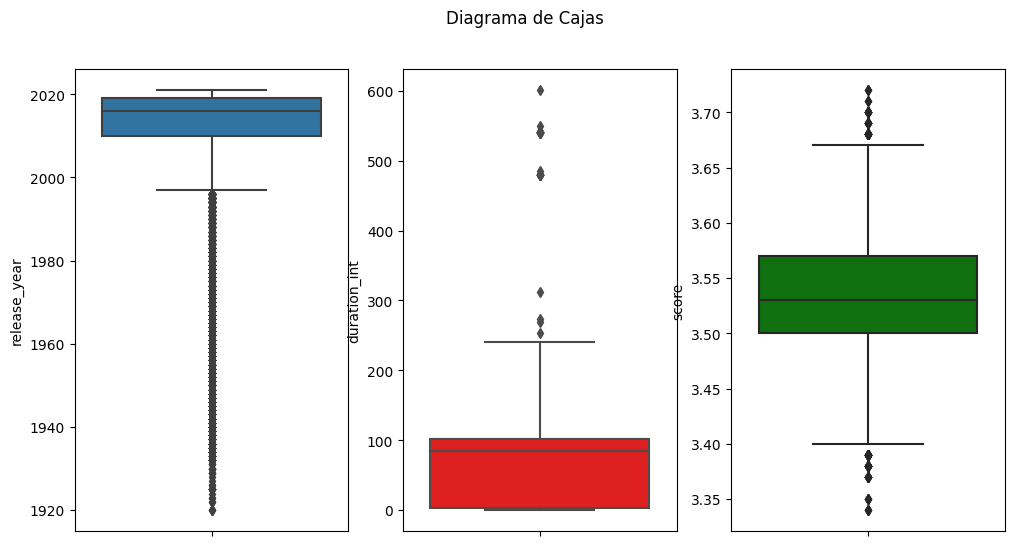

In [5]:
fig,ax=plt.subplots(1,3,figsize=(12,6))
fig.suptitle("Diagrama de Cajas")
sns.boxplot(y="release_year",data=df_movie,ax=ax[0])
sns.boxplot(y="duration_int",data=df_movie,ax=ax[1],color="red")
sns.boxplot(y="score",data=df_movie,ax=ax[2],color="green");

In [6]:
# Visualizando posibles errores en 'duration_int' (min)
df_movie[df_movie.duration_int<=0]

,id,type,title,director,cast,country,date_added,release_year,rating,listed_in,description,duration_int,duration_type,score
788,as789,movie,testing title - parichey is using this title,tester,test1,NaN,NaN,2020,g,action,test movie for upload,0.0,min,3.52
1381,as1382,movie,paradise canyon - digitally remastered,carl pierson,"john wayne, marion burns, earle hodgins, yakim...",NaN,NaN,1935,7+,"action, adventure",an undercover agent for the government is sent...,0.0,min,3.56
1590,as1591,movie,movie_project_un_test_uhd,test director,"test actor 1, test actor 2",NaN,NaN,2019,g,comedy,movie_project_un_test_uhd short,0.0,min,3.53
4704,as4705,movie,asin_tombstone_test_target,test director,"test actor 1, test actor 2",NaN,NaN,2019,g,comedy,asin_tombstone_test_target short,0.0,min,3.57
5162,as5163,movie,asin_tombstone_test_target_04,test director,"test actor 1, test actor 2",NaN,NaN,2019,g,comedy,asin_tombstone_test_target_04 short,0.0,min,3.63
5191,as5192,movie,asintombstonetest-target,test director,"test actor 1, test actor 2",NaN,NaN,2019,g,comedy,asintombstonetest-target short,0.0,min,3.52
5701,as5702,movie,primevideoqatestmovie16 us,test director us,"test actor1 us, test actor2",NaN,NaN,2015,g,"action, drama",primevideoqatestmovie16 us title summary goes ...,0.0,min,3.54
6219,as6220,movie,primevideoqamovie11 us,test director us,"test actor1 us, test actor2",NaN,NaN,2015,g,"action, drama",primevideoqamovie11 us title summary goes here...,0.0,min,3.56
8575,as8576,movie,projectununapprovedmovietarget,test director,"test actor 1, test actor 2",NaN,NaN,2019,g,comedy,projectununapprovedmovietarget short,0.0,min,3.62
8834,as8835,movie,molly and me,lewis seiler,"gracie fields, roddy mcdowall, monty woolley, ...",NaN,NaN,1945,pg,"arts, entertainment, and culture, comedy","molly (fields), a poor struggling actress, dec...",0.0,min,3.56


* Se puede percibir outliers inferiores en las variables 'release_year' y 'score'. En la variable 'duration_int' podrían a ver algunos valores erróneos, puesto que una película no puede tener una duración de cero minutos.
* También se pueden observar outliers superiores en las variables 'score' y 'duration_int'. En esta última existen valores atípicos que se alejan demasiado del bigote superior e incluso de los demás outliers.

##### Histogramas

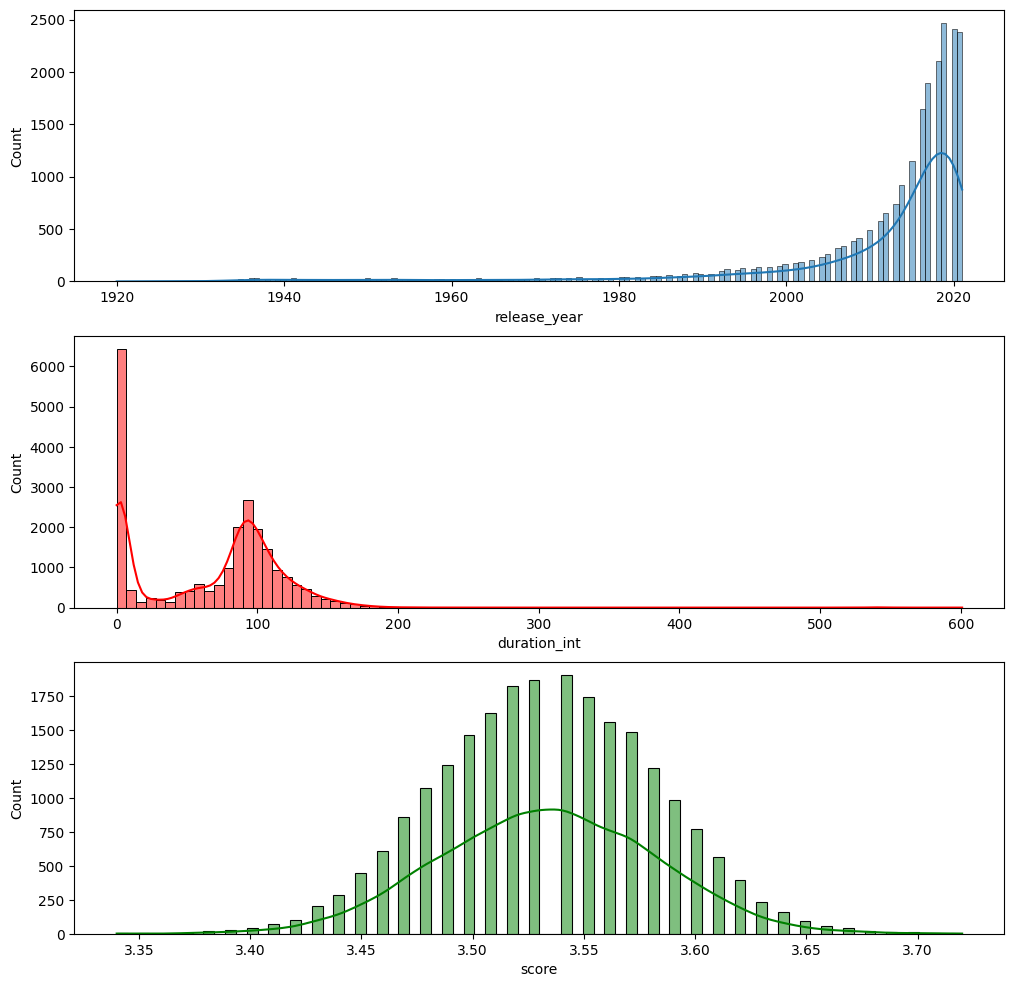

In [7]:
fig,ax=plt.subplots(3,1,figsize=(12,12))
sns.histplot(data=df_movie,x="release_year",kde=True,ax=ax[0])
sns.histplot(data=df_movie,x="duration_int",kde=True,ax=ax[1],color="red")
sns.histplot(data=df_movie,x="score",kde=True,ax=ax[2],color="green");

* Se observa que el histograma de la variable 'release_year' es sesgado hacia la izquierda, esto se debe a los outliers inferiores y a la gran cantidad de películas que se añadieron a la plataforma alrededor del año 2019.
* El histograma de la variable 'duration_int' es multimodal con picos principales aproximadamente en 1 y 90. Además, es sesgado hacia la derecha debido a sus outliers superiores y a los valores atípicos que están cerca de 600.
* Por último, el histograma de la variable 'score' es simétrico, con el pico mayor aproximadamente en 3.54.

##### Pairplot

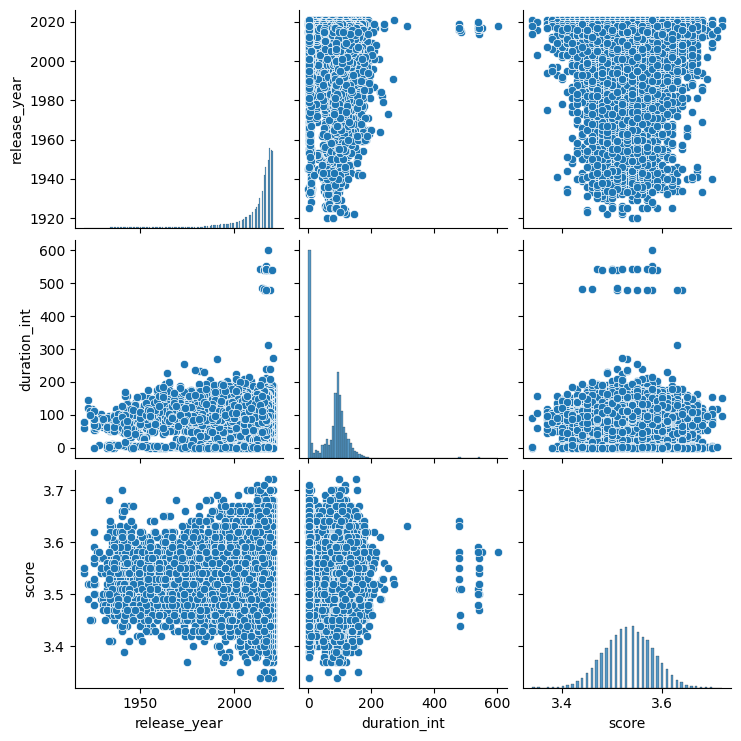

In [8]:
sns.pairplot(data=df_movie);

Con este gráfico podemos visualizar mejor los outliers, los puntos que se alejan de las agrupaciones de puntos.

#### Variables categóricas

##### Countplot

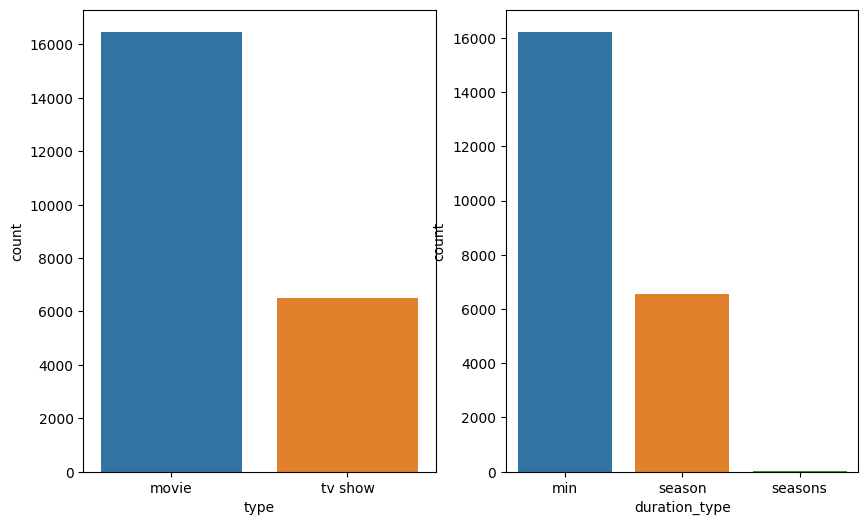

In [9]:
fig,ax=plt.subplots(1,2,figsize=(10,6))
sns.countplot(x="type",data=df_movie,ax=ax[0])
sns.countplot(x="duration_type",data=df_movie,ax=ax[1]);

In [10]:
print("Porcentaje 'movie': ",((df_movie[df_movie.type=="movie"].type.count())/df_movie.shape[0])*100,"%")
print("Porcentaje 'min': ",((df_movie[df_movie.duration_type=="min"].duration_type.count())/df_movie.shape[0])*100,"%")

Porcentaje 'movie':  71.66275328289416 %
Porcentaje 'min':  70.58005043916862 %


* Se puede percibir que en las variables 'type' y 'duration_type' sus valores están desbalanceados, donde 'movie' y 'min' representan más del 70% de los registros. Esta similitud en el porcentaje se debe a la alta correlación positiva que existe entre estas variables.

## EDA: data frame "df_user"

#### Carga de datos

In [4]:
df_user=pd.read_csv(r"Datasets/rating_transformation.csv")
df_user.head(3)

,userId,rating,movieId
0,1,1.0,as680
1,1,4.5,ns2186
2,1,5.0,hs2381


In [83]:
df_user.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11024289 entries, 0 to 11024288
Data columns (total 3 columns):
 #   Column   Dtype  
---  ------   -----  
 0   userId   int64  
 1   rating   float64
 2   movieId  object 
dtypes: float64(1), int64(1), object(1)
memory usage: 252.3+ MB


In [85]:
df_user.isnull().sum()

userId     0
rating     0
movieId    0
dtype: int64

No existe ningún valor nulo.

##### 'df_user' se separa en 4 data frames según la plataforma, para facilitar el análisis de los datos. Además, en 'df_movie' solo se mantendrán las dos columnas a utilizar antes mencionadas para la etapa de Machine Learning.

In [5]:
amazon=df_user[df_user.movieId.str[0]=="a"].reset_index(drop=True)
disney=df_user[df_user.movieId.str[0]=="d"].reset_index(drop=True)
hulu=df_user[df_user.movieId.str[0]=="h"].reset_index(drop=True)
netflix=df_user[df_user.movieId.str[0]=="n"].reset_index(drop=True)
movie=df_movie[["id","title"]].rename(columns={"id":"movieId","title":"name"})

#### Cantidad de usuarios únicos por Plataforma de Streaming

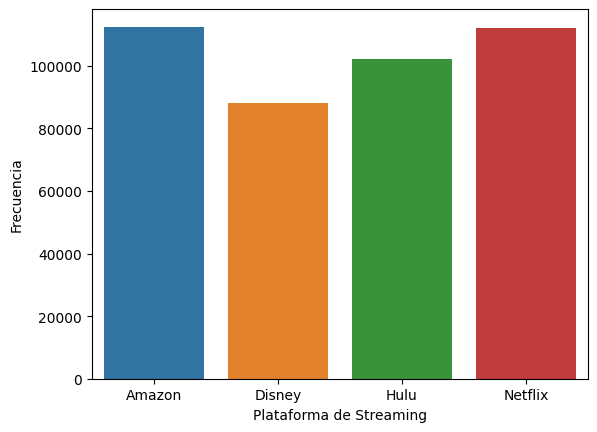

In [118]:
sns.barplot(x=["Amazon","Disney","Hulu","Netflix"],
            y=[amazon.userId.nunique(),
               disney.userId.nunique(),
               hulu.userId.nunique(),
               netflix.userId.nunique()])
plt.ylabel("Frecuencia")
plt.xlabel("Plataforma de Streaming");

La plataforma Amazon tiene la mayor cantidad de usuarios, mientras que la plataforma Disney tiene la menor cantidad.

#### Cantidad de valores para cada puntaje

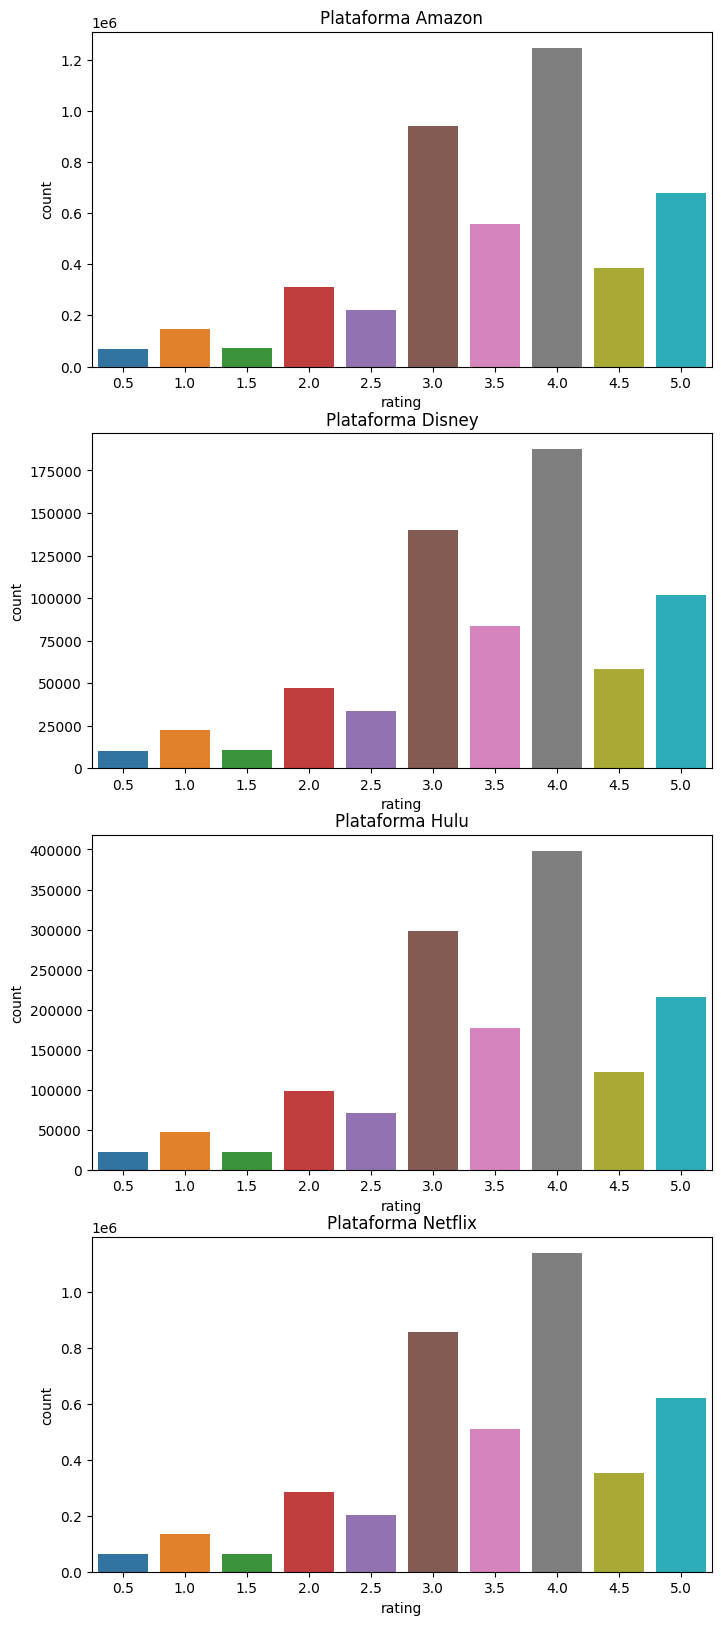

In [134]:
fig,ax=plt.subplots(4,1,figsize=(8,20))
sns.countplot(x="rating",data=amazon,ax=ax[0])
ax[0].set_title("Plataforma Amazon")
sns.countplot(x="rating",data=disney,ax=ax[1])
ax[1].set_title("Plataforma Disney")
sns.countplot(x="rating",data=hulu,ax=ax[2])
ax[2].set_title("Plataforma Hulu")
sns.countplot(x="rating",data=netflix,ax=ax[3])
ax[3].set_title("Plataforma Netflix");

Los puntajes de 4 y 3 son los más votados por los usuarios, mientras que los menos votados son 0.5 y 1.5

#### Top 5 de películas más votadas y menos votadas por plataforma

Creamos una función que nos proporcione un data frame con el Top N de películas

In [30]:
def top(df,N,value=True):
    if value:
        df=df.groupby("movieId").count().sort_values(by="userId",ascending=False).head(N)
    else:
        df=df.groupby("movieId").count().sort_values(by="userId").head(N)
    df=pd.merge(df,movie,on="movieId",how="inner")
    return df[["name","userId"]].rename(columns={"userId":"count"})

##### Cinco películas más votadas

In [82]:
pd.concat([top(amazon,5).rename(columns={"name":"movie_amazon"}),
           top(disney,5).rename(columns={"name":"movie_disney"}),
           top(hulu,5).rename(columns={"name":"movie_hulu"}),
           top(netflix,5).rename(columns={"name":"movie_netflix"})],axis=1)

,movie_amazon,count,movie_disney,count,movie_hulu,count,movie_netflix,count
0,from other worlds,576,national treasure,552,dietland,556,"leapfrog: sing-along, read-along",558
1,the organization,560,far away from raven’s home,549,battle over britney: the conservatorship hearing,554,el-khawaga's dilemma,553
2,superbook,558,tugboat mickey,543,star trek: enterprise,547,14 cameras,552
3,sideways,556,planes,539,rurouni kenshin,547,theeram,551
4,all good things,556,the secret of the magic gourd,537,corporate animals,545,barbie in princess power,550


##### Cinco películas menos votadas

In [83]:
pd.concat([top(amazon,5,False).rename(columns={"name":"movie_amazon"}),
           top(disney,5,False).rename(columns={"name":"movie_disney"}),
           top(hulu,5,False).rename(columns={"name":"movie_hulu"}),
           top(netflix,5,False).rename(columns={"name":"movie_netflix"})],axis=1)

,movie_amazon,count,movie_disney,count,movie_hulu,count,movie_netflix,count
0,mitzi (nbc 1968),396,cars toon: hiccups,405,i am alone,401,"rob schneider: asian momma, mexican kids",399
1,tranquil lake sounds for sleep 8 hours,407,"happy birthday, mickey!",407,dave,404,cop and a half: new recruit,402
2,john tucker must die,410,disney vampirina,413,jormungand,408,russell peters: almost famous,405
3,kansas city confidential,410,toy story 4,416,catch-22,409,how to be really bad,406
4,baahubali the lost legends,410,raya and the last dragon,418,pawn stars,411,berlin kaplani,408


* Basándonos en los datos de los tops de películas que hemos analizado, podemos concluir que es importante mantener todas las películas en nuestra base de datos, incluso aquellas menos populares, ya que su inclusión contribuye a la calidad general del modelo de recomendación de Machine Learning y garantiza que los usuarios tengan una amplia selección de películas para elegir. Eliminar películas menos votadas podría afectar negativamente el modelo y reducir la efectividad de las recomendaciones realizadas, puesto que la cantidad de votaciones entre ambos tops no difiere significativamente. Por lo tanto, la inclusión de películas menos populares de nuestros data frames es esencial para garantizar recomendaciones precisas y efectivas para todos los usuarios.